# Στοιχεία ομάδας
# Β17
## Λαμπρινίδης-Λέντελ Βλαντισλάβ, 01314054
## Μαρμάνης Ιάσων, 03114088

# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
Ημερομηνία εκφώνησης άσκησης: 3/12/18
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 



## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [1]:
import pandas as pd
dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα μπορεί να βρει [εδώ](https://docs.google.com/spreadsheets/d/12AmxMqvjrc0ruNmZYTBNxvnEktbec1DRG64LW7SX4HA/edit?usp=sharing) τον μοναδικό  αριθμό της "Seed" από 1 έως 128. 

2. Το data frame `df_data_2` έχει 128 γραμμές (ομάδες) και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας από το Google Sheet.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

### **Seed της ομάδας μας (Β17) : 81**

In [2]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 81

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="50%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing) των ασκήσεων.


In [4]:
print(corpus_tf_idf.shape)

(5000, 48375)


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [5]:
import scipy as sp
from scipy.spatial.distance import cosine
class ContentRecommender():
    def __init__(self, c_tf_idf):
        self.c_tf_idf_d = c_tf_idf.toarray() #sparse to dense
        
    def __call__(self, target_movie, max_recommendations):
        sorted_ind = np.argsort([cosine(self.c_tf_idf_d[target_movie], movie) 
                      for movie in self.c_tf_idf_d])
        for i, mid in enumerate(sorted_ind[:max_recommendations + 1]):
            if i == 0:
                assert(mid == target_movie)
                print("*** Target Movie {} ***".format(target_movie))
            else:
                print("\n*** Recommended movie No. {} ***".format(i))
                print("Movie ID: {}".format(mid))
            print("Title: {}".format(titles[mid]))
            print("Summary: {}".format(corpus[mid]))
            print("Genres : {}".format(categories[mid]))
            if i == 0:
                print("\n*** {} most related movies based on content ***".format(max_recommendations))

In [6]:
content_recommender = ContentRecommender(corpus_tf_idf)

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




### Υλοποίηση και επεξήγηση επιλογών 

In [7]:
import nltk
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('rslp')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to /home/iasonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /home/iasonas/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [8]:
class StemTokenizer(object):
    def __init__(self, sws):
        self.psl = PorterStemmer()
        self.sws = sws
    def __call__(self, doc):
        return [self.psl.stem(t) for t in word_tokenize(doc) if t not in self.sws]

Χρησιμοποιούμε την μέθοδο stemming. Αφαιρούμε τα stop_words και μέσω της παραμέτρου stop_words και κατά την διάρκεια του tokenize διότι μία stop word μπορεί μετά το stemming να μην αποτελεί stop word και έτσι να μην αφαιρεθεί.

In [9]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(
    ['plot', 'film', 'movie', 'cast', 'twist']
)
vectorizer =  TfidfVectorizer(
    max_df=0.7,
    min_df=10,
    tokenizer=StemTokenizer(stop_words),
    stop_words = stop_words,
    binary=True
)

Παρατηρούμε αρχικά πως υπάρχουν κάποιες τετριμμένες λέξεις που εμφανίζονται στις περιλήψεις των ταινιών και τις αφαιρούμε προσθέτοντάς τες στα stop words.

Χρησιμοποιούμε τις παραμέτρους {max,min}\_df για να μειώσουμε το πλήθος των χαρακτηριστικών.
Το 70% max\_df είναι μία αρκετά λογική τιμή και είδαμε πως παραπάνω μείωση δεν μειώνει δραστικά το πλήθος των χαρακτηριστικών. Η min\_df από την άλλη το επηρεάζει δραστικά και είναι η κύρια πηγή απώλειας χρήσιμης πληροφορίας, με κέρδος όμως την μείωση του πίνακα χαρακτηριστικών και συνεπώς την μείωση του χρόνου. Το θέσαμε σε μία τιμή όπου δεν μειώνεται πολύ η ποιότητα των προβλέψεων και το μέγεθος είναι σε λογικά πλαίσια (λίγο πάνω από 4-5MB μετά τη συμπίεση).

Επίσης παρατηρήσαμε το εξής:  
Μερικές λέξεις εμφανίζονται υπερβολικά πολλές φορές στα κείμενα και έτσι οδηγούν στο να συμπεράνει το σύστημά μας μία νοηματική συνάφεια μεταξύ τους που όμως δεν υπάρχει, δηλαδή να το επηρεάσει υπερβολικά η χρήση 1-2 λέξεων. Αυτό εμφανίζεται πολύ έντονα με τα ονόμα των πρωταγωνιστών που ενώ επαναλαμβάνονται πολλές φορές, δεν δίνουν καμία πληροφορία για ομοιότητα κειμένων, με ελάχιστες εξαιρέσεις που όντως αναφέρονται στο ίδιο χαρακτήρα σε διαφορετικές ταινίες. Αυτό μας οδήγησε να χρησιμοποιήσουμε την παράμετρο binary στον tf-idf που κάνει μία δυαδική κανονικοποίηση των tf-idf. Με μία επισκόπηση των ταινιών που παρατηρήσαμε τα αποτελέσματα φάνηκαν να βελτιώνονται.

In [10]:
# Αντί για κλήση και υπολογισμό απλά κάνουμε load το αντικείμενο από το αρχείο

# corpus_tf_idf = vectorizer.fit_transform(corpus)
# content_recommender = ContentRecommender(corpus_tf_idf)
from sklearn.externals import joblib
# joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

In [11]:
print(corpus_tf_idf.shape)
content_recommender = ContentRecommender(corpus_tf_idf)

(5000, 5883)


Το πλήθος των χαρακτηριστικών φαίνεται ικανοποιητικό αφού σχεδόν υπό-δεκαπλασιαστηκε.

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

In [12]:
# Παράδειγμα κλήσης της content_recommender που υλοποιήσαμε
content_recommender(2018, 3)

*** Target Movie 2018 ***
Title: ['The Adventures of Quentin Durward']
Summary: In 1465, honorable but penniless Scottish knight Quentin Durward  agrees to go to France to find out if the beautiful young heiress, Isabelle, Countess of Marcroy , would be a suitable wife for his aged uncle . The marriage has been arranged by Charles, Duke of Burgundy  for his ward to cement an alliance with Scotland, but she wants nothing to do with it, so she runs away and seeks the protection of Charles' great rival, Louis XI , the King of France. Quentin pursues and manages to foil an attempted robbery by brigands under the command of Count William de La Marck , though Isabelle continues on her way unaware of her protector's identity. Nearing the court of King Louis, Quentin tries, but fails, to save the life of a gypsy. However, the dead man's brother, Hayraddin ([[George Cole , is grateful for his efforts. Louis, who had ordered the man's hanging as a Burgundian spy, and distrusts such honest men as

### Ποιοτική ερμηνεία
Η περιγραφή της διαδικασίας βελτιστοποίησης έγινε παραπάνω.  
Παραθέτουμε κάποιες ταινίες και την θεματική ενότητα που τις ενώνει με τις προτάσεις της ```content_recommender``` που υλοποιήσαμε.  

| Movie id | Θεματική ενότητα|
| --- | --- |
| 1 | Δικαστήριο, δικηγόροι |
| 2 | Ληστεία, ορυχεία, χρυσός|
| 3 | Γάμος, οικογένεια |
| 4 | Παρανομία (outlaws), western, χρυσός |
| 5 | Έγκλημα, φόνος, δράμα |
| 6 | Zombies, πτώματα, βιασμός, horror |
| 12 | Γάμος, οικογένεια, έρωτας |
| 16 | Φαντασία, υπερήρωες, ιαπωνική παραγωγή |
| 17 | Musical |
| 18 | Παιδιά, σχολείο |
| 19 | Τέρατα, περίεργα πλάσμα |
| 20 | Διάστημα, επιστημονική φαντασία |

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
from sklearn.externals import joblib  
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα. Προσοχή: αυτό ισχύει μόνο στα Azure και Kaggle, στο Colab και στο IBM τα αρχεία εξαφανίζονται όταν ανακυκλώνεται ο πυρήνας και θα πρέπει να τα αποθηκεύετε τοπικά. Περισσότερα στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing).

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [13]:
from sklearn.externals import joblib
# joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [14]:
# !ls -lh

και μπορούμε να τα διαβάσουμε με `joblib.load`

In [15]:
# corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

Σημειώστε ότι το IBM Watson δείνει "Kernel dead" εάν δεν έχετε βελτιστοποιήσει το tfidf και μικρύνει τις διαστάσεις του dataset (πιθανότατα κάποια υπέρβαση μνήμης).

In [16]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [17]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [18]:
final_set.shape

(5000, 6205)

Με βάση την εμπειρία σας στην προετοιμασί των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

### Πιθανή προεπεξεργασία
Έχουμε κανονικοποιήσει ήδη τις tf-idf με το binary flag και οι catbis είναι σε . Επίσης δεν έχει νόημα κάποιο oversampling αφού δεν έχουμε μοναδική κατηγορία για κάθε τιμή και άλλωστε έχουμε unsupervised learning (δεν υπάρχει label). Το feature extraction έχει ήδη γίνει και έχουμε ήδη κάνει ένα feature selection έμμεσα αφαιρώντας κάποιες συχνές-σπάνιες λέξεις, συνεπώς δεν φαίνεται να υπάρχει κάποια άλλη προφανής προεπεξεργασία που μπορούμε να κάνουμε.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [19]:
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-
idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


In [20]:
# Φορτώνουμε τον χάρτη που έχουμε ήδη υπολογίσει από το αρχείο.

# som = somoclu.Somoclu(30, 30, compactsupport=False, kerneltype=0)
# som.train(build_final_set(doc_limit=5000), epochs=100)
# joblib.dump(som, 'som.pkl') 
som = joblib.load('som.pkl')

In [21]:
print(som.codebook.shape)

(30, 30, 6205)



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [22]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.



## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.



## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



In [23]:
from sklearn.cluster import KMeans
# Δεν εκτελούμε διαφορετικό KMeans, έχουμε φορτώσει το .pkl αρχείο
# som.cluster(algorithm=KMeans(n_clusters=20))
# joblib.dump(som, 'som.pkl') 

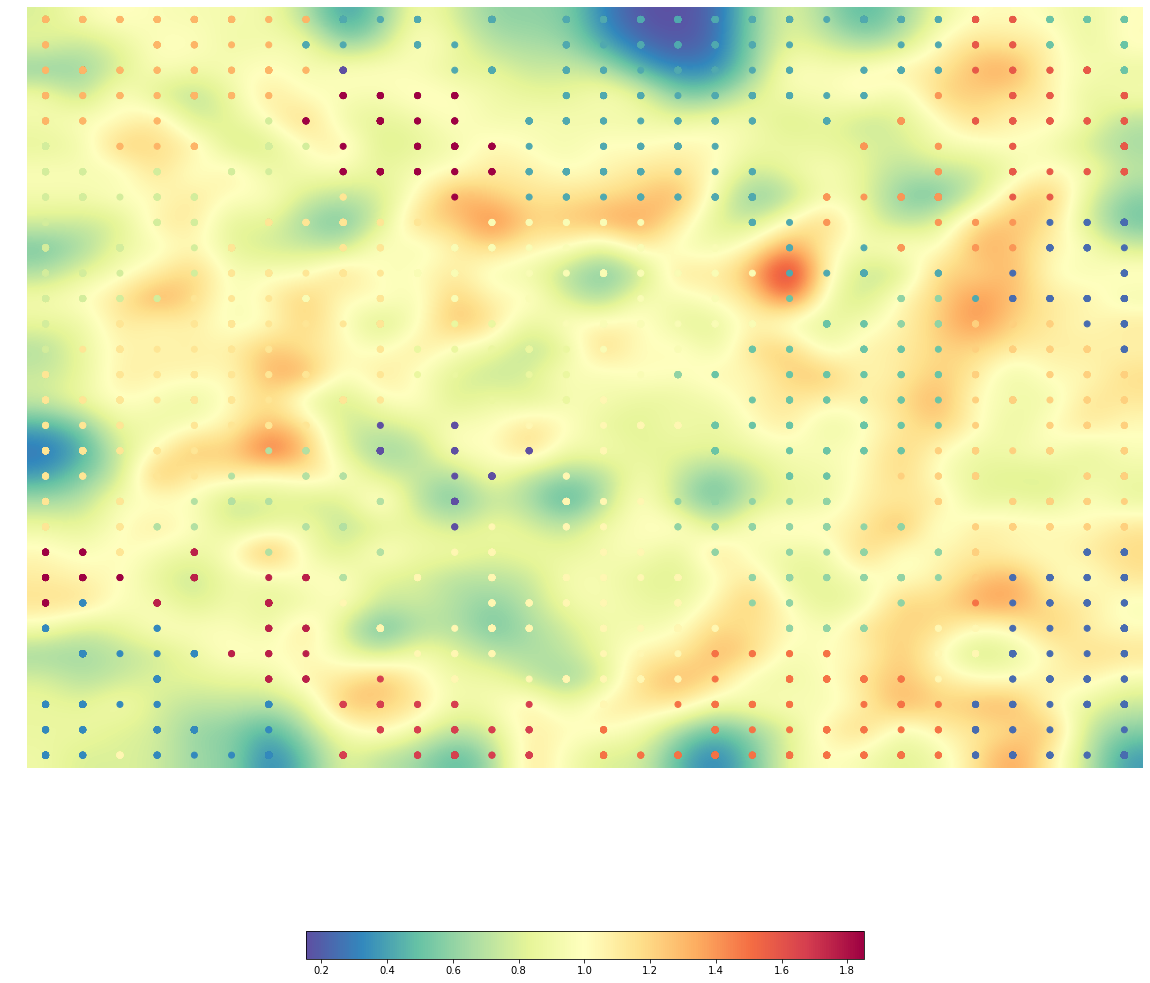

In [24]:
som.view_umatrix(bestmatches=True, figsize=(20,20), colorbar=True)
matplotlib.pyplot.show()

Παρατηρώντας το U-matrix διακρίνουμε περίπου 20 περιοχές που έχουν μπλέ-πράσινο χρώμα και γύρω τους είναι κίτρινο πορτοκαλί χρώμα και έτσι επιλέγουμε αυτή την τιμή για τον K-means.

In [25]:
np.set_printoptions(linewidth=200)
print(som.clusters)
cl_id, count = np.unique(som.clusters, return_counts=True)
sorted_ind = np.argsort(count)
print("\n\n")
print("Clusters sorted by increasing number of neurons:")
print("Cluster index")
print("Number of neurons")
print(np.array([cl_id[sorted_ind], count[sorted_ind]]))

[[13 13 13 13 13 13 13 13  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 16 16  4  4  4]
 [13 13 13 13 13 13 13  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 16 16  4  4  4]
 [13 13 13 13 13 13 13 13  0  0  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 16 16 16 16  4]
 [13 13 13 13 13 13 13 13 19 19 19 19  3  3  3  3  3  3  3  3  3  3  3 14 14 16 16 16 16 16]
 [13 13 13 13 13 13  7 19 19 19 19 19 19  3  3  3  3  3  3  3  3  3 14 14 14 16 16 16 16 16]
 [ 7 13 13 13 13  7  7  7 19 19 19 19 19  3  3  3  3  3  3  3  3 14 14 14 14 16 16 16 16 16]
 [ 7  7  7  7  7  7  7 19 19 19 19 19 19  3  3  3  3  3  3  3  3 14 14 14 14 14 16 16 16 16]
 [ 7  7  7  7  7  7 11 11 11 19 19 19 19  3  3  3  3  3  3  3  3 14 14 14 14 14 16 16  1  1]
 [ 7  7  7  7  7 11 11 11 11 11 11  9  9  9  9  9  9  3  9  3  3 14 14 14 14 14 14  1  1  1]
 [ 7  7  7  7  7 11 11 11 11 11  9  9  9  9  9  9  9  9  9  9  3  3  3 14 14 14 14  1  1  1]
 [ 7  7  7  7  7 11 11 11 11 11  9  9  9  9  9  9  9  9  9  9  3  3  3

## Παράμετροι som training
Σε ότι αφορά τις παραμέτρους εκπαίδευσης, ελέγξαμε μόνο την radiuscooling. Για ```radiuscooling = exponential``` παρατηρήσαμε πως οι αποστάσεις (χρώματα στο U-matrix) έγιναν κάπως πιο smooth. Επιλέξαμε να αφήσουμε την default τιμή (```linear```) για να είναι πιο εύκολα διαχωρίσιμα τα clusters, οπτικά τουλάχιστον.


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

Υλοποιήσαμε την ```print_cluster_neurons_movies_report``` ακολουθώντας περίπου τη διαδικασία που προτάθηκε.

In [26]:
from pprint import pprint
_M_SIZE = 5000
def print_categories_stats(ids):
    cats = []
    for idx in ids:
        cats.extend([s.strip() for s in categories[idx][0].split(',')])
    categs, count = np.unique(cats, return_counts=True)
    sorted_ind = np.argsort(count)[::-1]
    pprint(list(zip(categs[sorted_ind], count[sorted_ind])))

def neuron_movies_report(indxs):
    ids = [i for i in range(_M_SIZE) if indices[i] in indxs ]
    print_categories_stats(ids)
    
def print_cluster_neurons_movies_report(cid):
    indxs = []
    for el in np.column_stack(np.where(som.clusters==cid))[:,::-1]:
        # el = [y, x] = neuron of cluster cid
        t = np.where(np.equal(ubmus, el).all(1))
        if t[0].size != 0:
            assert t[0].size == 1
            indxs.append(t[0][0])
    neuron_movies_report(indxs)

In [27]:
print_cluster_neurons_movies_report(1)

[('"Action"', 382),
 ('"Action/Adventure"', 165),
 ('"Drama"', 116),
 ('"Adventure"', 97),
 ('"Comedy"', 74),
 ('"World cinema"', 53),
 ('"Martial Arts Film"', 52),
 ('"War film"', 46),
 ('"Crime Fiction"', 41),
 ('"Science Fiction"', 39),
 ('"Western"', 36),
 ('"Chinese Movies"', 36),
 ('"Fantasy"', 31),
 ('"Black-and-white"', 27),
 ('"Japanese Movies"', 23),
 ('"Romance Film"', 22),
 ('"Animation"', 21),
 ('"Indie"', 17),
 ('"Family Film"', 16),
 ('"Horror"', 15),
 ('"Sports"', 14),
 ('"Anime"', 14),
 ('"Parody"', 14),
 ('"Action Comedy"', 13),
 ('"Crime Comedy"', 12),
 ('"Buddy film"', 10),
 ('"Historical fiction"', 10),
 ('"Comedy film"', 10),
 ('"Wuxia"', 9),
 ('"Superhero movie"', 9),
 ('"Epic"', 8),
 ('"Combat Films"', 8),
 ('"Period piece"', 8),
 ('"Film adaptation"', 8),
 ('"Swashbuckler films"', 7),
 ('"Spy"', 7),
 ('"Costume drama"', 6),
 ('"Cult"', 6),
 ('"Slapstick"', 6),
 ('"History"', 6),
 ('"Biographical film"', 5),
 ('"Costume Adventure"', 5),
 ('"Heist"', 5),
 ('"Blac

Τα αποτελέσματα φαίνονται πολύ ικανοποιητικά, οι κατηγορίες ταινιών ενός cluster αποτελούνται κυρίως από 2-3 μεγάλες κατηγορίες που έχουν άμεση σχέση μεταξύ τους (πχ western-action). Ακόμα όμως και σε μικρές κατηγορίες βλέπουμε μία συνάφεια (πχ war film, revisionist western). Υπάρχουν βέβαια και μερικές κατηγορίες που δεν φαίνονται να έχουν μεγάλη σχέση (family fiml), αλλά είναι αναμενόμενες κάποιες αστοχίες.


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


### Τοπολογικές ιδιότητες

#### 1

Αρχικά, βλέπουμε πόσες ταινίες υπάρχουν σε κάθε κατηγορία:

In [28]:
neuron_movies_report(list(range(5000)))

[('"Drama"', 2254),
 ('"Comedy"', 1247),
 ('"Thriller"', 803),
 ('"Romance Film"', 771),
 ('"Action"', 724),
 ('"World cinema"', 622),
 ('"Crime Fiction"', 534),
 ('"Horror"', 497),
 ('"Action/Adventure"', 457),
 ('"Indie"', 448),
 ('"Black-and-white"', 430),
 ('"Adventure"', 401),
 ('"Short Film"', 395),
 ('"Family Film"', 390),
 ('"Romantic drama"', 334),
 ('"Musical"', 311),
 ('"Science Fiction"', 304),
 ('"Animation"', 294),
 ('"Mystery"', 260),
 ('"Fantasy"', 229),
 ('"Romantic comedy"', 225),
 ('"Comedy film"', 200),
 ('"Crime Thriller"', 198),
 ('"War film"', 183),
 ('"Silent film"', 156),
 ('"Japanese Movies"', 156),
 ('"Film adaptation"', 153),
 ('"Period piece"', 149),
 ('"Comedy-drama"', 146),
 ('"Documentary"', 144),
 ('"Bollywood"', 138),
 ('"Western"', 135),
 ('"Psychological thriller"', 133),
 ('"Chinese Movies"', 114),
 ('"Parody"', 107),
 ('"Teen"', 99),
 ('"Family Drama"', 96),
 ('"Black comedy"', 95),
 ('"Children\'s/Family"', 95),
 ('"Martial Arts Film"', 90),
 ('"S

Ορίζουμε μία συνάρτηση που με βάση μια κατηγορία μας επιστρέφει το πλήθος των νευρώνων στους οποίους απεικονίζονται ταινίες με αυτή την κατηγορία:

In [29]:
def neurons_of_cat(cat):
    return np.unique([bmus[mid] for mid in range(5000)\
               if cat in [s.strip() for s in categories[mid][0].split(',')]], axis=0).shape[0]

Και μία συνάρτηση που μας επιστρέφει όλες τις κατηγορίες ταινιών:

In [30]:
def movie_cat():
    cats = []
    for idx in range(5000):
        cats.extend([s.strip() for s in categories[idx][0].split(',')])
    categs, count = np.unique(cats, return_counts=True)
    return categs

Και εκτυπωνουμε με φθήνουσα σειρά τις κατηγορίες με βάση το πλήθος των νευρώνων που αναφέρονται σε αυτές. 

In [31]:
from operator import itemgetter
all_categs = movie_cat()
sorted(list(zip(all_categs, map(neurons_of_cat, all_categs))), key=itemgetter(1), reverse=True)

[('"Drama"', 328),
 ('"Comedy"', 220),
 ('"Thriller"', 170),
 ('"Action"', 149),
 ('"Adventure"', 147),
 ('"Crime Fiction"', 139),
 ('"Indie"', 138),
 ('"Romance Film"', 137),
 ('"World cinema"', 136),
 ('"Horror"', 126),
 ('"Fantasy"', 120),
 ('"Science Fiction"', 118),
 ('"Action/Adventure"', 117),
 ('"Black-and-white"', 114),
 ('"Mystery"', 96),
 ('"Musical"', 83),
 ('"Family Film"', 82),
 ('"Film adaptation"', 74),
 ('"Sports"', 65),
 ('"Teen"', 65),
 ('"War film"', 65),
 ('"Period piece"', 61),
 ('"Short Film"', 61),
 ('"Crime Thriller"', 60),
 ('"Romantic drama"', 59),
 ('"Comedy-drama"', 57),
 ('"Japanese Movies"', 57),
 ('"Comedy film"', 55),
 ('"Black comedy"', 54),
 ('"Coming of age"', 53),
 ('"Television movie"', 52),
 ('"Psychological thriller"', 51),
 ('"Animation"', 50),
 ('"Western"', 50),
 ('"Chinese Movies"', 47),
 ('"Cult"', 46),
 ('"Political drama"', 44),
 ('"Romantic comedy"', 44),
 ('"Family Drama"', 43),
 ('"Satire"', 43),
 ('"Biographical film"', 37),
 ('"Melodr

Βλέπουμε ξεκάρα πως η σειρά των κατηγοριών σχεδόν ταυτίζεται στις μεγάλες κατηγορίες.
Οι πιο συχνές είναι οι: Drama, Comedy, Thriller, Action, Adventure, Indie, Romance Film, Horror.
Οι λιγότερο συχνές κατηγορίες (έχουν μόνο μία ταινία) προφανώς αντιστοιχούν σε μόνο ένα νευρώνα.

#### 2-3

Σημειώνουμε μερικά clusters που είναι μακριά το ένα από το άλλο στο χάρτη, πχ τα 15, 16, 8, 4. Με την ```print_cluster_neurons_movies_report``` παρατηρούμε τις μεγαλύτερες κατηγορίες για να δούμε τι είδους ταινίες βρίσκονται εκεί.

In [32]:
for i in [13,1,4,2]:
    print("*** Cluster {} ****".format(i))
    print_cluster_neurons_movies_report(i)

*** Cluster 13 ****
[('"Drama"', 270),
 ('"Romance Film"', 270),
 ('"Romantic drama"', 258),
 ('"World cinema"', 138),
 ('"Musical"', 46),
 ('"Bollywood"', 44),
 ('"Period piece"', 44),
 ('"Film adaptation"', 38),
 ('"Indie"', 29),
 ('"Thriller"', 20),
 ('"Comedy"', 20),
 ('"Black-and-white"', 19),
 ('"Crime Fiction"', 18),
 ('"War film"', 14),
 ('"Action/Adventure"', 13),
 ('"Melodrama"', 13),
 ('"Comedy-drama"', 12),
 ('"Art film"', 11),
 ('"Coming of age"', 11),
 ('"Costume drama"', 11),
 ('"Adventure"', 9),
 ('"Political drama"', 8),
 ('"Television movie"', 8),
 ('"Romantic comedy"', 8),
 ('"Ensemble Film"', 7),
 ('"Mystery"', 7),
 ('"Japanese Movies"', 7),
 ('"Marriage Drama"', 7),
 ('"Action"', 6),
 ('"Chinese Movies"', 6),
 ('"Biography"', 6),
 ('"Biographical film"', 6),
 ('"Epic"', 6),
 ('"Fantasy"', 5),
 ('"History"', 5),
 ('"Western"', 4),
 ('"Family Drama"', 4),
 ('"Road movie"', 4),
 ('"Biopic [feature]"', 4),
 ('"Crime Thriller"', 3),
 ('"Musical Drama"', 3),
 ('"New Holl

To cluster 13 αφορά ρομαντικές ταινίες, ρομακτικές κομεντύ κλπ.   
To cluster 1 αφορά ταινίες περιπέτειας - δράσης.  
Το cluster 4 αφορά ταινιες δράματος, μυστηρίου και εγκλήματος.  
Τέλος το cluster 2 αφορά κυρίως "παιδικές ταινίες", μικρού μήκους animated, οικογενειακές κλπ.  

Πράγματι δηλαδή σημασιολογικά μακρινές ταινίες είναι και μακριά στο χάρτη.

Αντίστροφα, έχουμε πχ πως τα clusters 2,3,12,9 είναι αρκετά κοντά το ένα στο άλλο. Εκτυπώνουμε τις κατηγορίες τους:

In [33]:
for i in [13, 3, 19, 7]:
    print("*** Cluster {} ****".format(i))
    print_cluster_neurons_movies_report(i)

*** Cluster 13 ****
[('"Drama"', 270),
 ('"Romance Film"', 270),
 ('"Romantic drama"', 258),
 ('"World cinema"', 138),
 ('"Musical"', 46),
 ('"Bollywood"', 44),
 ('"Period piece"', 44),
 ('"Film adaptation"', 38),
 ('"Indie"', 29),
 ('"Thriller"', 20),
 ('"Comedy"', 20),
 ('"Black-and-white"', 19),
 ('"Crime Fiction"', 18),
 ('"War film"', 14),
 ('"Action/Adventure"', 13),
 ('"Melodrama"', 13),
 ('"Comedy-drama"', 12),
 ('"Art film"', 11),
 ('"Coming of age"', 11),
 ('"Costume drama"', 11),
 ('"Adventure"', 9),
 ('"Political drama"', 8),
 ('"Television movie"', 8),
 ('"Romantic comedy"', 8),
 ('"Ensemble Film"', 7),
 ('"Mystery"', 7),
 ('"Japanese Movies"', 7),
 ('"Marriage Drama"', 7),
 ('"Action"', 6),
 ('"Chinese Movies"', 6),
 ('"Biography"', 6),
 ('"Biographical film"', 6),
 ('"Epic"', 6),
 ('"Fantasy"', 5),
 ('"History"', 5),
 ('"Western"', 4),
 ('"Family Drama"', 4),
 ('"Road movie"', 4),
 ('"Biopic [feature]"', 4),
 ('"Crime Thriller"', 3),
 ('"Musical Drama"', 3),
 ('"New Holl

Το cluster 3 αφορά κυρίως drama, romance, indie ταινίες.   
Το cluster 19 αφορά drama ,black-and-white, indie.  
Τέλος το cluster 7 αφορά comedy, romance και drama .

Πέρα από το ότι όλα έχουν πολλές ταινίες δράματος, βλέπουμε πως το περιεχόμενό τους έχει μία σχέση το ένα με το άλλο, ειδικά σε πολύ γειτονικά clusters όπως το 13 και το 7, σε αντίθεση με μακρινά clusters που είχαν εντελώς αντίθετο περιεχόμενο.

### Ασαφή clusters

Από μεγάλα clusters με λιγότερο σαφή χαρακτηριστικά είναι το 10:

In [34]:
print_cluster_neurons_movies_report(10)

[('"Comedy film"', 75),
 ('"Western"', 60),
 ('"Japanese Movies"', 60),
 ('"Adventure"', 59),
 ('"Science Fiction"', 55),
 ('"Action/Adventure"', 48),
 ('"Fantasy"', 44),
 ('"Silent film"', 44),
 ('"Animation"', 37),
 ('"Family Film"', 33),
 ('"Crime Fiction"', 29),
 ('"War film"', 20),
 ('"Mystery"', 20),
 ('"Chinese Movies"', 17),
 ('"Anime"', 15),
 ('"Comedy-drama"', 14),
 ('"World cinema"', 13),
 ('"Drama"', 12),
 ('"Children\'s/Family"', 11),
 ('"Romantic comedy"', 10),
 ('"Romantic drama"', 7),
 ('"Indie"', 7),
 ('"Melodrama"', 6),
 ('"Costume drama"', 5),
 ('"Martial Arts Film"', 5),
 ('"Comedy"', 5),
 ('"Black-and-white"', 5),
 ('"Television movie"', 5),
 ('"Biographical film"', 5),
 ('"Children\'s Fantasy"', 4),
 ('"Revisionist Western"', 4),
 ('"Film adaptation"', 4),
 ('"Fantasy Adventure"', 4),
 ('"Detective"', 4),
 ('"Action"', 4),
 ('"Bollywood"', 4),
 ('"Monster movie"', 3),
 ('"Film noir"', 3),
 ('"Spy"', 3),
 ('"Family-Oriented Adventure"', 3),
 ('"Thriller"', 3),
 ('"

Ο λόγος για αυτό φαίνεται από το χάρτη πως το cluster αποτελείται από πολλά μικρότερα που είναι αρκετά κοντά μεταξύ τους (μπλέ χρώμα). Αν και οι διαφορές των υπο-clusters δεν είναι πολύ μεγάλες, θα ήταν καλύτερο να αποτελούν ξεχωριστό cluster το καθένα.

Επειδή δεν είχαμε πολλά μικρά clusters, δεν καταφέραμε να βρούμε κάποιο που δεν είχε σαφή χαρακτηριστικά, δηλαδή να μην αποτελείται κυρίως από 2-3 μεγάλες κατηγορίες που σχετίζονται σχετικά μεταξύ τους.

### Iδιαίτερο ενδιαφέρον

Πολύ ενδιαφέρον μας φάνηκε το cluster 15 λόγω του πόσο καλά έγινε η ομαδοποίηση των κατηγοριών. Συγκεκριμένα σχεδόν όλες οι κατηγορίες με πάνω από 7-8 ταινίες σκιαγραφούν ένα συγκεκριμένο είδος ταινιών με τρόμο, τέρατα, zombies, υπερφυσικό περιεχόμενο κλπ.

In [50]:
print_cluster_neurons_movies_report(15)

[('"Horror"', 258),
 ('"Science Fiction"', 53),
 ('"Slasher"', 43),
 ('"B-movie"', 43),
 ('"Creature Film"', 30),
 ('"Cult"', 28),
 ('"World cinema"', 25),
 ('"Zombie Film"', 21),
 ('"Indie"', 20),
 ('"Teen"', 17),
 ('"Supernatural"', 16),
 ('"Monster movie"', 13),
 ('"Natural horror films"', 11),
 ('"Japanese Movies"', 10),
 ('"Psychological thriller"', 9),
 ('"Action"', 8),
 ('"Fantasy"', 7),
 ('"Mystery"', 7),
 ('"Crime Fiction"', 6),
 ('"Horror Comedy"', 6),
 ('"Television movie"', 6),
 ('"Chinese Movies"', 6),
 ('"Comedy film"', 6),
 ('"Sci-Fi Horror"', 6),
 ('"Adventure"', 6),
 ('"Drama"', 5),
 ('"Action/Adventure"', 5),
 ('"Short Film"', 5),
 ('"Comedy"', 5),
 ('"Monster"', 4),
 ('"Thriller"', 4),
 ('"Film adaptation"', 4),
 ('"Black-and-white"', 4),
 ('"Costume Horror"', 3),
 ('"Parody"', 3),
 ('"Splatter film"', 3),
 ('"Satire"', 3),
 ('"Gothic Film"', 3),
 ('"Alien Film"', 3),
 ('"Blaxploitation"', 2),
 ('"Doomsday film"', 2),
 ('"Black comedy"', 2),
 ('"Erotic thriller"', 2)


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο mycourses το παρόν notebook επεξεργασμένο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Προσέξτε ώστε να **απαντήσετε σε όλα τα σημεία όπου απαιτείται**.
- Μαζί Θα παραδώσετε τα joblib dumps των τελικών `corpus_tf_idf.pkl` και `som.pkl` (μεγάλος χάρτης - 5000 ταινίες) που θα χρησιμοποιήσετε. Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στο dump του χάρτη που θα μας παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. Οδηγίες για την αποθήκευση των dumps θα βρείτε στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing). 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **4 αρχεία (το .ipynb και το .py του notebook καθώς και τα δύο .pkl)**
- **Το maximum upload filesize στο mycourses είναι 29MB**, εάν το zip σας είναι μεγαλύτερο, δεν έχετε βελτιστοποιήσει το tfidf.

<table>
  <tr>
    <td bgcolor="#FCF8E3"><font size="4">ΞΑΝΑ: Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!!</font>
</td>
  </tr>
</table>


## Ημερομηνία παράδοσης ##

Πέμπτη 17 Ιανουαρίου 2019 αυστηρά (παρακαλούμε όχι αιτήματα για παράταση).

Καλή επιτυχία!
